## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
print(x_train.shape)

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

(50000, 32, 32, 3)
(50000, 3072)


In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 42s 844us/step - loss: 1.8589 - accuracy: 0.3333 - val_loss: 1.7147 - val_accuracy: 0.3912
Epoch 2/500
50000/50000 [==============================] - 58s 1ms/step - loss: 1.6445 - accuracy: 0.4185 - val_loss: 1.6538 - val_accuracy: 0.4037
Epoch 3/500
50000/50000 [==============================] - 31s 613us/step - loss: 1.5589 - accuracy: 0.4480 - val_loss: 1.6134 - val_accuracy: 0.4114
Epoch 4/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.4971 - accuracy: 0.4703 - val_loss: 1.5825 - val_accuracy: 0.4367
Epoch 5/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.4463 - accuracy: 0.4891 - val_loss: 1.5500 - val_accuracy: 0.4501
Epoch 6/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.4019 - accuracy: 0.5045 - val_loss: 1.6085 - val_accuracy: 0.4439
Epoch 7/500
50000/50000 [===========================

Epoch 55/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.3401 - accuracy: 0.8806 - val_loss: 2.1127 - val_accuracy: 0.5337
Epoch 56/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.3309 - accuracy: 0.8826 - val_loss: 2.1491 - val_accuracy: 0.5272
Epoch 57/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.3325 - accuracy: 0.8815 - val_loss: 2.1391 - val_accuracy: 0.5352
Epoch 58/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.3118 - accuracy: 0.8908 - val_loss: 2.2627 - val_accuracy: 0.5186
Epoch 59/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.2956 - accuracy: 0.8957 - val_loss: 2.3791 - val_accuracy: 0.5273
Epoch 60/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.2854 - accuracy: 0.9011 - val_loss: 2.4869 - val_accuracy: 0.5165
Epoch 61/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.2846 - ac

50000/50000 [==============================] - 14s 281us/step - loss: 0.1077 - accuracy: 0.9613 - val_loss: 3.7655 - val_accuracy: 0.5272
Epoch 110/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.1168 - accuracy: 0.9581 - val_loss: 3.9038 - val_accuracy: 0.5205
Epoch 111/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.1342 - accuracy: 0.9523 - val_loss: 4.0249 - val_accuracy: 0.5099
Epoch 112/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.1190 - accuracy: 0.9591 - val_loss: 3.7567 - val_accuracy: 0.5238
Epoch 113/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.0967 - accuracy: 0.9658 - val_loss: 3.8609 - val_accuracy: 0.5307
Epoch 114/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.0695 - accuracy: 0.9756 - val_loss: 3.8978 - val_accuracy: 0.5278
Epoch 115/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.0590 - accuracy:

50000/50000 [==============================] - 14s 287us/step - loss: 7.2203e-04 - accuracy: 1.0000 - val_loss: 4.6936 - val_accuracy: 0.5511
Epoch 163/500
50000/50000 [==============================] - 15s 290us/step - loss: 6.7210e-04 - accuracy: 1.0000 - val_loss: 4.7139 - val_accuracy: 0.5549
Epoch 164/500
50000/50000 [==============================] - 14s 286us/step - loss: 5.7238e-04 - accuracy: 1.0000 - val_loss: 4.7178 - val_accuracy: 0.5541
Epoch 165/500
50000/50000 [==============================] - 14s 287us/step - loss: 7.6836e-04 - accuracy: 1.0000 - val_loss: 4.7463 - val_accuracy: 0.5518
Epoch 166/500
50000/50000 [==============================] - 14s 289us/step - loss: 6.8328e-04 - accuracy: 1.0000 - val_loss: 4.7322 - val_accuracy: 0.5552
Epoch 167/500
50000/50000 [==============================] - 14s 277us/step - loss: 5.5083e-04 - accuracy: 1.0000 - val_loss: 4.7470 - val_accuracy: 0.5535
Epoch 168/500
50000/50000 [==============================] - 14s 283us/step - 

50000/50000 [==============================] - 14s 280us/step - loss: 2.2817e-04 - accuracy: 1.0000 - val_loss: 4.9925 - val_accuracy: 0.5526
Epoch 215/500
50000/50000 [==============================] - 14s 281us/step - loss: 2.2460e-04 - accuracy: 1.0000 - val_loss: 4.9981 - val_accuracy: 0.5540
Epoch 216/500
50000/50000 [==============================] - 14s 282us/step - loss: 2.2526e-04 - accuracy: 1.0000 - val_loss: 5.0006 - val_accuracy: 0.5528
Epoch 217/500
50000/50000 [==============================] - 14s 280us/step - loss: 2.2040e-04 - accuracy: 1.0000 - val_loss: 5.0052 - val_accuracy: 0.5528
Epoch 218/500
50000/50000 [==============================] - 14s 282us/step - loss: 2.2034e-04 - accuracy: 1.0000 - val_loss: 5.0045 - val_accuracy: 0.5536
Epoch 219/500
50000/50000 [==============================] - 14s 283us/step - loss: 2.1908e-04 - accuracy: 1.0000 - val_loss: 5.0084 - val_accuracy: 0.5538
Epoch 220/500
50000/50000 [==============================] - 14s 279us/step - 

50000/50000 [==============================] - 14s 281us/step - loss: 1.5262e-04 - accuracy: 1.0000 - val_loss: 5.1264 - val_accuracy: 0.5544
Epoch 267/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.5126e-04 - accuracy: 1.0000 - val_loss: 5.1293 - val_accuracy: 0.5535
Epoch 268/500
50000/50000 [==============================] - 14s 282us/step - loss: 1.5079e-04 - accuracy: 1.0000 - val_loss: 5.1316 - val_accuracy: 0.5545
Epoch 269/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.4962e-04 - accuracy: 1.0000 - val_loss: 5.1336 - val_accuracy: 0.5547
Epoch 270/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.4881e-04 - accuracy: 1.0000 - val_loss: 5.1340 - val_accuracy: 0.5544
Epoch 271/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.4846e-04 - accuracy: 1.0000 - val_loss: 5.1367 - val_accuracy: 0.5537
Epoch 272/500
50000/50000 [==============================] - 14s 283us/step - 

50000/50000 [==============================] - 14s 286us/step - loss: 1.1671e-04 - accuracy: 1.0000 - val_loss: 5.2180 - val_accuracy: 0.5542
Epoch 319/500
50000/50000 [==============================] - 14s 282us/step - loss: 1.1671e-04 - accuracy: 1.0000 - val_loss: 5.2187 - val_accuracy: 0.5540
Epoch 320/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.1547e-04 - accuracy: 1.0000 - val_loss: 5.2210 - val_accuracy: 0.5538
Epoch 321/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.1570e-04 - accuracy: 1.0000 - val_loss: 5.2211 - val_accuracy: 0.5540
Epoch 322/500
50000/50000 [==============================] - 14s 285us/step - loss: 1.1460e-04 - accuracy: 1.0000 - val_loss: 5.2236 - val_accuracy: 0.5537
Epoch 323/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.1413e-04 - accuracy: 1.0000 - val_loss: 5.2245 - val_accuracy: 0.5543
Epoch 324/500
50000/50000 [==============================] - 14s 278us/step - 

50000/50000 [==============================] - 14s 288us/step - loss: 9.5401e-05 - accuracy: 1.0000 - val_loss: 5.2887 - val_accuracy: 0.5546
Epoch 371/500
50000/50000 [==============================] - 14s 280us/step - loss: 9.4694e-05 - accuracy: 1.0000 - val_loss: 5.2894 - val_accuracy: 0.5529
Epoch 372/500
50000/50000 [==============================] - 14s 286us/step - loss: 9.4827e-05 - accuracy: 1.0000 - val_loss: 5.2910 - val_accuracy: 0.5535
Epoch 373/500
50000/50000 [==============================] - 14s 286us/step - loss: 9.4289e-05 - accuracy: 1.0000 - val_loss: 5.2919 - val_accuracy: 0.5539
Epoch 374/500
50000/50000 [==============================] - 13s 269us/step - loss: 9.3954e-05 - accuracy: 1.0000 - val_loss: 5.2940 - val_accuracy: 0.5539
Epoch 375/500
50000/50000 [==============================] - 14s 279us/step - loss: 9.3573e-05 - accuracy: 1.0000 - val_loss: 5.2950 - val_accuracy: 0.5543
Epoch 376/500
50000/50000 [==============================] - 14s 287us/step - 

50000/50000 [==============================] - 8s 162us/step - loss: 8.0755e-05 - accuracy: 1.0000 - val_loss: 5.3462 - val_accuracy: 0.5529
Epoch 423/500
50000/50000 [==============================] - 8s 163us/step - loss: 8.0377e-05 - accuracy: 1.0000 - val_loss: 5.3482 - val_accuracy: 0.5526
Epoch 424/500
50000/50000 [==============================] - 8s 161us/step - loss: 8.0020e-05 - accuracy: 1.0000 - val_loss: 5.3485 - val_accuracy: 0.5527
Epoch 425/500
50000/50000 [==============================] - 8s 162us/step - loss: 8.0090e-05 - accuracy: 1.0000 - val_loss: 5.3512 - val_accuracy: 0.5532
Epoch 426/500
50000/50000 [==============================] - 8s 162us/step - loss: 7.9655e-05 - accuracy: 1.0000 - val_loss: 5.3518 - val_accuracy: 0.5532
Epoch 427/500
50000/50000 [==============================] - 8s 161us/step - loss: 7.9344e-05 - accuracy: 1.0000 - val_loss: 5.3528 - val_accuracy: 0.5532
Epoch 428/500
50000/50000 [==============================] - 8s 163us/step - loss: 7

Epoch 475/500
50000/50000 [==============================] - 8s 164us/step - loss: 6.9889e-05 - accuracy: 1.0000 - val_loss: 5.3991 - val_accuracy: 0.5526
Epoch 476/500
50000/50000 [==============================] - 8s 163us/step - loss: 6.9768e-05 - accuracy: 1.0000 - val_loss: 5.4011 - val_accuracy: 0.5522
Epoch 477/500
50000/50000 [==============================] - 8s 162us/step - loss: 6.9563e-05 - accuracy: 1.0000 - val_loss: 5.4005 - val_accuracy: 0.5525
Epoch 478/500
50000/50000 [==============================] - 8s 161us/step - loss: 6.9327e-05 - accuracy: 1.0000 - val_loss: 5.4013 - val_accuracy: 0.5529
Epoch 479/500
50000/50000 [==============================] - 8s 163us/step - loss: 6.9273e-05 - accuracy: 1.0000 - val_loss: 5.4036 - val_accuracy: 0.5529
Epoch 480/500
50000/50000 [==============================] - 8s 161us/step - loss: 6.8947e-05 - accuracy: 1.0000 - val_loss: 5.4036 - val_accuracy: 0.5529
Epoch 481/500
50000/50000 [==============================] - 8s 162us/

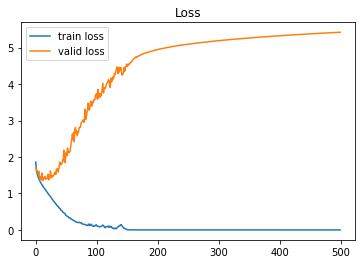

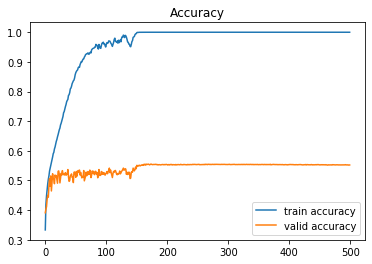

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()